#     >>>>>>...Brain Segmentation with CNN in MRI images...<<<<<<<
                                              Rahul Kumar
                                         Mechatronics (1911MT11)
                                  Department of Mechanical Engineering
                               Indian Institute of Technology, Patna, Bihar.

In [2]:
# Mounting google drive for using the BraTS 2015 training dataset
from google.colab import drive      
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install simpleitk # Installations Required


In [1]:
# Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
from keras import backend as K
from utils import create_data, augmentation
from Unet_model import  unet_model, dice_coef, dice_coef_loss
from Simple_model import simple_model, dice_coef, dice_coef_loss


Using TensorFlow backend.


In [0]:
# Calling GPU
import keras.backend.tensorflow_backend as tfback

def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus


In [0]:
# Initialization
K.set_image_data_format("channels_first")                          # Input shape in the future will be (batch_size, no_of_channels, img_size, img_size)
#K.set_image_dim_ordering("th")
img_size = 120      #original img size is 240*240
num_epoch = 5


In [0]:
# Creating the data for segmented sequences and loading it in y
create_data('/content/drive/My Drive/Datasets/BRATS2015_Training/HGG/', '**/*OT*.mha', label=True, resize=(155,img_size,img_size))
y = np.load('y_{}.npy'.format(img_size))


In [0]:
# Creating the data for T2-flair sequences and loading it in x1
create_data('/content/drive/My Drive/Datasets/BRATS2015_Training/HGG/', '**/*Flair*.mha', label=False, resize=(155,img_size,img_size))
x1 = np.load('x_{}.npy'.format(img_size))

In [0]:
# Creating the data for T1 weighted sequences and loading it in x2
create_data('/content/drive/My Drive/Datasets/BRATS2015_Training/HGG/', '**/*T1[^c]*.mha', label=False, resize=(155,img_size,img_size))
x2 = np.load('x_{}.npy'.format(img_size))

Processing--- **/*T1[^c]*.mha


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 32, 32) (32 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Saved 220 to x_32


In [0]:
# Creating the data for T1c weighted sequences and loading it in x3
create_data('/content/drive/My Drive/Datasets/BRATS2015_Training/HGG/', '**/*T1c*.mha', label=False, resize=(155,img_size,img_size))
x3 = np.load('x_{}.npy'.format(img_size))

Processing--- **/*T1c*.mha


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 32, 32) (32 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Saved 220 to x_32


In [0]:
# Creating the data for T2 weighted sequences and loading it in x4
create_data('/content/drive/My Drive/Datasets/BRATS2015_Training/HGG/', '**/*T2*.mha', label=False, resize=(155,img_size,img_size))
x4 = np.load('x_{}.npy'.format(img_size))

Processing--- **/*T2*.mha


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 1, 32, 32) (32 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Saved 220 to x_32


shape of the loaded data is :  (35200, 1, 120, 120) (35200, 1, 120, 120)


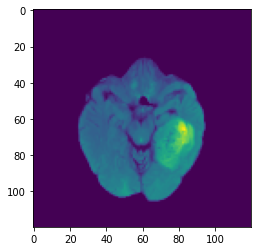

In [6]:
# Summary of the data loaded
plt.imshow(x1[0,0,:,:])
print("shape of the loaded data is : ",y.shape, x1.shape)

                                  __These are the four pulse sequences of each patient__
![These are the four pulse sequences of each patient](Assets/all.JPG)</br>
            _ _ _ _ _ _ _ _ _ _ _ _ _ _ _   This are the 155 slices per MRI pulse sequences._ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
![](Assets/slices.gif)

In [0]:
# Now creating a variable x for storing all four modalities/sequences/channels in one 
x = np.zeros((35200, 4, img_size,img_size))
x[:,0,:,:] = x1[:,0,:,:]
x[:,1,:,:] = x2[:,0,:,:]
x[:,2,:,:] = x3[:,0,:,:]
x[:,3,:,:] = x4[:,0,:,:]

print("shape of the input = (batch_size, no_of_channels, img_size, img_size)", x.shape)


shape of the input = (batch_size, no_of_channels, img_size, img_size) (35200, 4, 32, 32)


In [31]:
#training on Unet model
model = unet_model()
history = model.fit(x1, y, batch_size=32 ,nb_epoch= num_epoch, verbose=1, shuffle=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/5
35200/35200 [==============================] - 279s 8ms/step - loss: -0.7025 - dice_coef: 0.7025
Epoch 2/5
35200/35200 [==============================] - 276s 8ms/step - loss: -0.8633 - dice_coef: 0.8633
Epoch 3/5
35200/35200 [==============================] - 276s 8ms/step - loss: -0.8863 - dice_coef: 0.8863
Epoch 4/5
35200/35200 [==============================] - 275s 8ms/step - loss: -0.8975 - dice_coef: 0.8975
Epoch 5/5
35200/35200 [==============================] - 276s 8ms/step - loss: -0.9156 - dice_coef: 0.9156


#### 

In [10]:
# Prediction on Unet model
y_pred = model.predict(x1[10000:20000,:,:,:])
y_true = y[10000:20000,:,:,:]
dice_coef(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8450317>

In [20]:
# Training on Simple Model
model = simple_model()
history = model.fit(x1, y, batch_size=32, epochs=35, verbose = 1)



Epoch 1/35
35200/35200 [==============================] - 52s 1ms/step - loss: -0.1801 - dice_coef: 0.1801
Epoch 2/35
35200/35200 [==============================] - 52s 1ms/step - loss: -0.2067 - dice_coef: 0.2067
Epoch 3/35
35200/35200 [==============================] - 52s 1ms/step - loss: -0.2125 - dice_coef: 0.2125
Epoch 4/35
35200/35200 [==============================] - 52s 1ms/step - loss: -0.2175 - dice_coef: 0.2175
Epoch 5/35
35200/35200 [==============================] - 52s 1ms/step - loss: -0.2209 - dice_coef: 0.2209
Epoch 6/35
35200/35200 [==============================] - 52s 1ms/step - loss: -0.2257 - dice_coef: 0.2257
Epoch 7/35
35200/35200 [==============================] - 52s 1ms/step - loss: -0.2327 - dice_coef: 0.2327
Epoch 8/35
35200/35200 [==============================] - 52s 1ms/step - loss: -0.2422 - dice_coef: 0.2422
Epoch 9/35
35200/35200 [==============================] - 52s 1ms/step - loss: -0.2545 - dice_coef: 0.2545
Epoch 10/35
35200/35200 [============

In [21]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'dice_coef'])


In [0]:
# save model and weights
model.save('aug{}_{}_epoch{}'.format(num_of_aug,img_size,num_epoch))
model.save_weights('weights_{}_{}.h5'.format(img_size,num_epoch))
#model.load_weights('weights.h5')

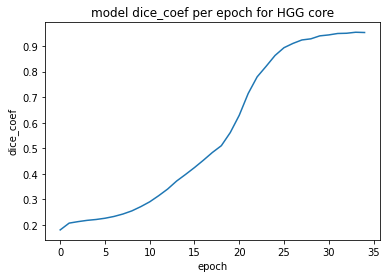

In [23]:
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.title('model dice_coef per epoch for HGG core')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.show()

In [24]:
# Prediction on simple model
y_pred = model.predict(x1[0:10000,:,:,:])
y_true = y[0:10000,:,:,:]
dice_coef(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.84367526>

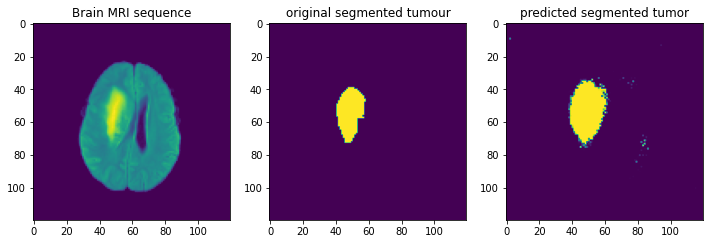

In [30]:
# Printing the original MRI slice , segmented slice and predicted segmented slice
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.title('Brain MRI sequence')
plt.imshow(x1[9530,:].reshape((120,120)))
plt.subplot(1,3,2)
plt.title('original segmented tumour')
plt.imshow(y[9530,0,:,:])
plt.subplot(1,3,3)
plt.title('predicted segmented tumor')
plt.imshow(y_pred[9530,:].reshape((img_size,img_size)))